[View in Colaboratory](https://colab.research.google.com/github/tomwilde/100DaysOfMLCode/blob/master/3_numpy_linearMultiVariateRegression.ipynb)

In [0]:
!pip install -U -q PyDrive

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import pandas
import io


# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# from: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#multivariable-regression
#
# We need a cost fn and its derivative...

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1_d2opSoZgMsSeoQUjtOcRQj5l0zO-Upi' # Advertising.csv
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

dataset = pandas.read_csv(io.StringIO(downloaded.GetContentString())).as_matrix()

In [0]:
def cost_function(features, targets, weights):
    N = len(targets)

    predictions = predict(features, weights)

    # Matrix math lets use do this without looping
    sq_error = (predictions - targets)**2

    # Return average squared error among predictions
    return 1.0/(2*N) * sq_error.sum()

In [0]:
def predict(features, weights):
  return np.dot(features,weights)

In [0]:
def update_weights_vectorized(X, targets, weights, lr):
    companies = len(X)

    #1 - Get Predictions
    predictions = predict(X, weights)

    #2 - Calculate error/loss
    error = targets - predictions

    #3 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  error matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(-X.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= companies

    #5 - Multiply the gradient by our learning rate
    gradient *= lr

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [0]:
def train(X, y, weights, alpha, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights_vectorized(X, y, weights, alpha)

        # Calculate cost for auditing purposes
        cost = cost_function(X, y, weights)

        # Log Progress
        if i % 100 == 0:
          print "iter: "+str(i) + " cost: "+str(cost)
    return weights


In [0]:
# work it out 
y = dataset[:,4].reshape(200,1)
X = dataset[:,[1,2]].reshape(200,2)

weights = np.ones((3,1))
c = 0

alpha = 0.005
iters = 1000

# normalise the data
bias = np.ones(shape=(200,1))
y = y/np.linalg.norm(y, ord=np.inf, axis=0, keepdims=True)
X = X/np.linalg.norm(X, ord=np.inf, axis=0, keepdims=True)
X = np.append(bias, X, axis=1)
               

In [20]:
weights = train(X, y, weights, alpha, iters)
print(weights)

iter: 0 cost: 1.0620039644495907
iter: 100 cost: 0.23891384784811767
iter: 200 cost: 0.05553498853369302
iter: 300 cost: 0.014633274820046414
iter: 400 cost: 0.005467607163534063
iter: 500 cost: 0.0033741170231745546
iter: 600 cost: 0.002859520656557491
iter: 700 cost: 0.0027001051802395216
iter: 800 cost: 0.002623070129855546
iter: 900 cost: 0.0025674158583251982
[[0.05202777]
 [0.49953975]
 [0.46207218]]


(200,)
(100, 1)
(200,)
(100, 1)
(200, 1)
(100, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python2.7/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in divide


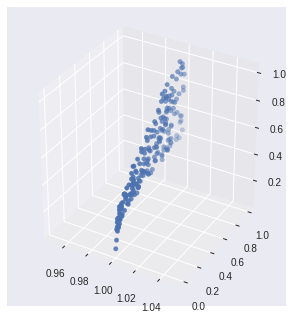

In [21]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

x1 = X.T[0]
y1 = X.T[1]
z1 = y

# surf = ax.plot_surface(x1, y1, z1, rstride=5, cstride=5, linewidth=0, antialiased=False)

ax.scatter3D(x1, y1, z1);

# we wantz to combine plots
plt.hold(True)

# now plot our prediction
# eqn of the form: pz = a*py + b*px + c

predictions = []

for a in range(0, 10):
    for b in range(0, 10):
        features = np.array([a/10, b/10, 0]).reshape(1, 3)
        zp = predict(features, weights)
        predictions.append([a/10, b/10 , zp[0][0]])

preds = np.array(predictions)

min = preds[:,2].min()
max = preds[:,2].max()

preds[:,2] = preds[:,2] / max

x2 = preds[:, 0].reshape(100, 1)
y2 = preds[:, 1].reshape(100, 1)
z2 = preds[:, 2].reshape(100, 1)

print(x1.shape)
print(x2.shape)

print(y1.shape)
print(y2.shape)

print(z1.shape)
print(z2.shape)

ax.scatter3D(x2, y2, z2)
plt.show()
